In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the csv file into a pandas DataFrame
player = pd.concat([pd.read_csv(f) for f in glob.glob('player_data/*c.csv')], 
                             ignore_index = True)

player.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV.1,PP.1,SH.1,S,TOI,ATOI,BLK,HIT,FOW,FOL
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,0,0,0,6,24,12:13,0.0,5,5.0,7.0
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,7,0,0,63,810,10:48,43.0,117,19.0,22.0
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,0,0,2,32,295,10:56,11.0,13,103.0,104.0
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,13,5,0,114,899,16:03,6.0,25,1.0,4.0
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,2,0,0,25,722,20:37,52.0,53,1.0,1.0


In [3]:
# Read the csv files for advanced data into a pandas DataFrame
advanced = pd.concat([pd.read_csv(f, encoding="ISO-8859-1") for f in glob.glob('advanced_data/*corsi.csv')], 
                             ignore_index = True)

advanced.head()

,Age,CA,CF,CF%,CF% rel,E+/-,FA,FF,FF%,FF% rel,...,SAtt.,TK,TOI(EV),TOI/60,Thru%,Tm,dZS%,oZS%,oiSH%,oiSV%
0,20,18,19,51.4,-10.2,NaN,17,18,51.4,-11.6,...,8.0,1,11:31,12:13,75.0,DET,40.0,60.0,7.7,90.9
1,30,550,446,44.8,-9.2,NaN,408,340,45.5,-8.7,...,110.0,22,8:10,10:48,57.3,TOT,49.0,51.0,4.7,89.5
2,33,162,132,44.9,-7.8,NaN,128,104,44.8,-7.3,...,43.0,9,7:37,10:35,74.4,CHI,60.0,40.0,2.5,89.0
3,28,562,699,55.4,8.2,NaN,420,523,55.5,6.8,...,215.0,17,12:43,15:55,52.6,BUF,46.2,53.8,7.8,86.4
4,26,532,472,47.0,1.6,NaN,408,371,47.6,4.7,...,62.0,5,17:34,20:37,40.3,BOS,55.7,44.3,7.7,94.5


In [4]:
player

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV.1,PP.1,SH.1,S,TOI,ATOI,BLK,HIT,FOW,FOL
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,0,0,0,6,24,12:13,0.0,5,5.0,7.0
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,7,0,0,63,810,10:48,43.0,117,19.0,22.0
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,0,0,2,32,295,10:56,11.0,13,103.0,104.0
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,13,5,0,114,899,16:03,6.0,25,1.0,4.0
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,2,0,0,25,722,20:37,52.0,53,1.0,1.0
5,Daniel Alfredsson\alfreda01,35,OTT,RW,70,40,49,89,15,34,...,31,16,2,217,1560,22:17,30.0,55,21.0,18.0
6,Bobby Allen\allenbo01,29,BOS,D,19,0,0,0,-2,2,...,0,0,0,10,188,9:53,6.0,15,0.0,0.0
7,Bryan Allen\allenbr01,27,FLA,D,73,2,14,16,5,67,...,11,2,1,67,1554,21:17,119.0,112,0.0,0.0
8,Nik Antropov\antroni01,27,TOR,C,72,26,30,56,10,92,...,25,4,1,165,1448,20:07,51.0,102,114.0,157.0
9,Colby Armstrong\armstco01,25,TOT,RW,72,13,22,35,4,56,...,20,1,1,113,1157,16:04,31.0,85,3.0,12.0


In [5]:
advanced

,Age,CA,CF,CF%,CF% rel,E+/-,FA,FF,FF%,FF% rel,...,SAtt.,TK,TOI(EV),TOI/60,Thru%,Tm,dZS%,oZS%,oiSH%,oiSV%
0,20,18,19,51.4,-10.2,NaN,17,18,51.4,-11.6,...,8.0,1,11:31,12:13,75.0,DET,40.0,60.0,7.7,90.9
1,30,550,446,44.8,-9.2,NaN,408,340,45.5,-8.7,...,110.0,22,8:10,10:48,57.3,TOT,49.0,51.0,4.7,89.5
2,33,162,132,44.9,-7.8,NaN,128,104,44.8,-7.3,...,43.0,9,7:37,10:35,74.4,CHI,60.0,40.0,2.5,89.0
3,28,562,699,55.4,8.2,NaN,420,523,55.5,6.8,...,215.0,17,12:43,15:55,52.6,BUF,46.2,53.8,7.8,86.4
4,26,532,472,47.0,1.6,NaN,408,371,47.6,4.7,...,62.0,5,17:34,20:37,40.3,BOS,55.7,44.3,7.7,94.5
5,35,937,1077,53.5,2.9,NaN,746,788,51.4,0.1,...,366.0,72,15:11,22:14,58.7,OTT,39.9,60.1,11.5,89.6
6,29,120,125,51.0,-4.4,NaN,102,93,47.7,-6.2,...,18.0,0,8:50,9:53,55.6,BOS,53.8,46.2,2.9,94.8
7,27,1201,1094,47.7,-5.5,NaN,955,850,47.1,-5.4,...,164.0,27,17:11,21:17,40.9,FLA,51.7,48.3,8.3,93.3
8,27,955,987,50.8,-3.1,NaN,717,768,51.7,-2.1,...,297.0,30,13:54,20:03,55.6,TOR,46.6,53.4,10.0,90.6
9,25,874,787,47.4,4.3,NaN,671,617,47.9,3.9,...,183.0,42,12:30,16:03,61.7,TOT,61.0,39.0,10.4,92.4


In [6]:
# check that all data is merged

testdf=pd.merge(player,advanced,on=['Player', 'Age'],how="outer",indicator=True)
testdf=testdf[testdf['_merge']=='left_only']
testdf

,Player,Age,Tm_x,Pos_x,GP_x,G,A,PTS,+/-,PIM,...,TK,TOI(EV),TOI/60,Thru%,Tm_y,dZS%,oZS%,oiSH%,oiSV%,_merge


In [7]:
merged_df = pd.merge(player,
                 advanced,
                 on=['Player', 'Age'], 
                 #how='outer', 
                 indicator=True
                )
merged_df

,Player,Age,Tm_x,Pos_x,GP_x,G,A,PTS,+/-,PIM,...,TK,TOI(EV),TOI/60,Thru%,Tm_y,dZS%,oZS%,oiSH%,oiSV%,_merge
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,1,11:31,12:13,75.0,DET,40.0,60.0,7.7,90.9,both
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,22,8:10,10:48,57.3,TOT,49.0,51.0,4.7,89.5,both
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,9,7:37,10:35,74.4,CHI,60.0,40.0,2.5,89.0,both
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,17,12:43,15:55,52.6,BUF,46.2,53.8,7.8,86.4,both
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,5,17:34,20:37,40.3,BOS,55.7,44.3,7.7,94.5,both
5,Daniel Alfredsson\alfreda01,35,OTT,RW,70,40,49,89,15,34,...,72,15:11,22:14,58.7,OTT,39.9,60.1,11.5,89.6,both
6,Bobby Allen\allenbo01,29,BOS,D,19,0,0,0,-2,2,...,0,8:50,9:53,55.6,BOS,53.8,46.2,2.9,94.8,both
7,Bryan Allen\allenbr01,27,FLA,D,73,2,14,16,5,67,...,27,17:11,21:17,40.9,FLA,51.7,48.3,8.3,93.3,both
8,Nik Antropov\antroni01,27,TOR,C,72,26,30,56,10,92,...,30,13:54,20:03,55.6,TOR,46.6,53.4,10.0,90.6,both
9,Colby Armstrong\armstco01,25,TOT,RW,72,13,22,35,4,56,...,42,12:30,16:03,61.7,TOT,61.0,39.0,10.4,92.4,both


In [8]:
merged_df

,Player,Age,Tm_x,Pos_x,GP_x,G,A,PTS,+/-,PIM,...,TK,TOI(EV),TOI/60,Thru%,Tm_y,dZS%,oZS%,oiSH%,oiSV%,_merge
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,1,11:31,12:13,75.0,DET,40.0,60.0,7.7,90.9,both
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,22,8:10,10:48,57.3,TOT,49.0,51.0,4.7,89.5,both
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,9,7:37,10:35,74.4,CHI,60.0,40.0,2.5,89.0,both
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,17,12:43,15:55,52.6,BUF,46.2,53.8,7.8,86.4,both
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,5,17:34,20:37,40.3,BOS,55.7,44.3,7.7,94.5,both
5,Daniel Alfredsson\alfreda01,35,OTT,RW,70,40,49,89,15,34,...,72,15:11,22:14,58.7,OTT,39.9,60.1,11.5,89.6,both
6,Bobby Allen\allenbo01,29,BOS,D,19,0,0,0,-2,2,...,0,8:50,9:53,55.6,BOS,53.8,46.2,2.9,94.8,both
7,Bryan Allen\allenbr01,27,FLA,D,73,2,14,16,5,67,...,27,17:11,21:17,40.9,FLA,51.7,48.3,8.3,93.3,both
8,Nik Antropov\antroni01,27,TOR,C,72,26,30,56,10,92,...,30,13:54,20:03,55.6,TOR,46.6,53.4,10.0,90.6,both
9,Colby Armstrong\armstco01,25,TOT,RW,72,13,22,35,4,56,...,42,12:30,16:03,61.7,TOT,61.0,39.0,10.4,92.4,both


In [9]:
merged_df.columns

Index(['Player', 'Age', 'Tm_x', 'Pos_x', 'GP_x', 'G', 'A', 'PTS', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'CA', 'CF', 'CF%', 'CF% rel',
       'E+/-', 'FA', 'FF', 'FF%', 'FF% rel', 'GP_y', 'GV', 'PDO', 'Pos_y',
       'Rk', 'SAtt.', 'TK', 'TOI(EV)', 'TOI/60', 'Thru%', 'Tm_y', 'dZS%',
       'oZS%', 'oiSH%', 'oiSV%', '_merge'],
      dtype='object')

In [10]:
# Drop non numerical and duplicate columns
cleandf = merged_df.drop(columns = ['Player', 'Tm_x', 'Pos_x', 'ATOI', 'Rk', 'Tm_y', 'Pos_y', 'GP_y', 'TOI/60', 'TOI(EV)', '_merge'])
cleandf.head()

,Age,GP_x,G,A,PTS,+/-,PIM,PS,EV,PP,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
0,20,2,0,0,0,0,2,0.0,0,0,...,-11.6,0,98.6,8.0,1,75.0,40.0,60.0,7.7,90.9
1,30,75,4,7,11,-16,58,-0.6,3,0,...,-8.7,9,94.2,110.0,22,57.3,49.0,51.0,4.7,89.5
2,33,27,0,2,2,-7,13,-0.6,0,0,...,-7.3,3,91.5,43.0,9,74.4,60.0,40.0,2.5,89.0
3,28,56,10,18,28,-16,42,1.6,9,1,...,6.8,42,94.2,215.0,17,52.6,46.2,53.8,7.8,86.4
4,26,35,0,2,2,4,39,1.2,0,0,...,4.7,15,102.2,62.0,5,40.3,55.7,44.3,7.7,94.5


In [11]:
cleandf.columns

Index(['Age', 'GP_x', 'G', 'A', 'PTS', '+/-', 'PIM', 'PS', 'EV', 'PP', 'SH',
       'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL',
       'CA', 'CF', 'CF%', 'CF% rel', 'E+/-', 'FA', 'FF', 'FF%', 'FF% rel',
       'GV', 'PDO', 'SAtt.', 'TK', 'Thru%', 'dZS%', 'oZS%', 'oiSH%', 'oiSV%'],
      dtype='object')

In [12]:
# Determine max of points column
cleandf['PTS'].describe()

count    8845.000000
mean       20.672018
std        20.800314
min         0.000000
25%         3.000000
50%        14.000000
75%        33.000000
max       113.000000
Name: PTS, dtype: float64

In [13]:
# Replace NAN values with the mean
cleandf.fillna(cleandf.mean(), inplace=True)

In [14]:
# Preprocessing the data
bins = (-1, 33.5, 113)
group_names = ['not_scorer', 'scorer']
cleandf['PTS'] = pd.cut(cleandf['PTS'], bins = bins, labels = group_names)
cleandf['PTS'].unique()

[not_scorer, scorer]
Categories (2, object): [not_scorer < scorer]

In [15]:
label_quality = LabelEncoder()

In [16]:
cleandf['PTS'] = label_quality.fit_transform(cleandf['PTS'])
cleandf.head(5)

,Age,GP_x,G,A,PTS,+/-,PIM,PS,EV,PP,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
0,20,2,0,0,0,0,2,0.0,0,0,...,-11.6,0,98.6,8.0,1,75.0,40.0,60.0,7.7,90.9
1,30,75,4,7,0,-16,58,-0.6,3,0,...,-8.7,9,94.2,110.0,22,57.3,49.0,51.0,4.7,89.5
2,33,27,0,2,0,-7,13,-0.6,0,0,...,-7.3,3,91.5,43.0,9,74.4,60.0,40.0,2.5,89.0
3,28,56,10,18,0,-16,42,1.6,9,1,...,6.8,42,94.2,215.0,17,52.6,46.2,53.8,7.8,86.4
4,26,35,0,2,0,4,39,1.2,0,0,...,4.7,15,102.2,62.0,5,40.3,55.7,44.3,7.7,94.5


In [17]:
cleandf['PTS'].value_counts()

0    6684
1    2161
Name: PTS, dtype: int64

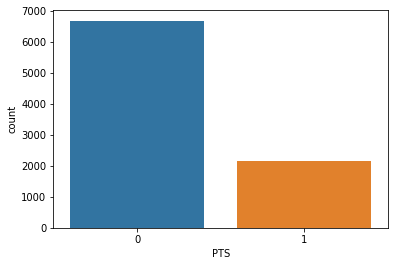

In [18]:
sns.countplot(cleandf['PTS'])

In [19]:
# Assign the data to X and y, x predicts y
X = cleandf.drop('PTS', axis = 1)
y = cleandf["PTS"]

In [20]:
X

,Age,GP_x,G,A,+/-,PIM,PS,EV,PP,SH,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
0,20,2,0,0,0,2,0.0,0,0,0,...,-11.600000,0,98.6,8.0,1,75.0,40.0,60.0,7.7,90.9
1,30,75,4,7,-16,58,-0.6,3,0,1,...,-8.700000,9,94.2,110.0,22,57.3,49.0,51.0,4.7,89.5
2,33,27,0,2,-7,13,-0.6,0,0,0,...,-7.300000,3,91.5,43.0,9,74.4,60.0,40.0,2.5,89.0
3,28,56,10,18,-16,42,1.6,9,1,0,...,6.800000,42,94.2,215.0,17,52.6,46.2,53.8,7.8,86.4
4,26,35,0,2,4,39,1.2,0,0,0,...,4.700000,15,102.2,62.0,5,40.3,55.7,44.3,7.7,94.5
5,35,70,40,49,15,34,11.5,24,9,7,...,0.100000,60,101.1,366.0,72,58.7,39.9,60.1,11.5,89.6
6,29,19,0,0,-2,2,0.0,0,0,0,...,-6.200000,5,97.7,18.0,0,55.6,53.8,46.2,2.9,94.8
7,27,73,2,14,5,67,3.9,2,0,0,...,-5.400000,25,101.7,164.0,27,40.9,51.7,48.3,8.3,93.3
8,27,72,26,30,10,92,6.5,14,12,0,...,-2.100000,53,100.6,297.0,30,55.6,46.6,53.4,10.0,90.6
9,25,72,13,22,4,56,3.2,12,1,0,...,3.900000,13,102.8,183.0,42,61.7,61.0,39.0,10.4,92.4


In [21]:
y

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       1
9       1
10      1
11      0
12      1
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8815    0
8816    0
8817    0
8818    1
8819    1
8820    1
8821    0
8822    0
8823    0
8824    1
8825    0
8826    0
8827    1
8828    0
8829    0
8830    0
8831    0
8832    0
8833    0
8834    0
8835    1
8836    0
8837    0
8838    0
8839    0
8840    1
8841    1
8842    1
8843    1
8844    0
Name: PTS, Length: 8845, dtype: int32

In [22]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train[:10]
y_train

7760    0
6566    1
7918    0
1539    0
6961    0
1211    1
7293    0
7922    0
672     0
6198    0
4995    0
7277    0
2716    0
4974    0
7530    0
1464    0
4921    0
7406    0
1192    0
2794    0
2264    0
421     1
505     0
8519    1
2623    0
1582    1
506     0
6844    0
2405    0
6215    0
       ..
4658    0
3005    1
2734    1
189     0
2747    1
2047    0
7849    0
2558    0
8666    0
6396    0
3385    0
4555    0
1184    0
6420    0
5051    0
5311    1
2433    0
6949    1
769     0
1685    0
8322    0
5578    0
4426    1
466     0
6265    0
5734    0
5191    0
5390    0
860     1
7270    1
Name: PTS, Length: 6191, dtype: int32

In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
# See how well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2010
           1       0.98      0.98      0.98       644

   micro avg       0.99      0.99      0.99      2654
   macro avg       0.99      0.99      0.99      2654
weighted avg       0.99      0.99      0.99      2654

[[1998   12]
 [  10  634]]


In [27]:
# Random Forest Accuracy Score
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9917106254709872

# SVM (Support Vector Machine) Classifier

In [28]:
from sklearn.svm import SVC
from sklearn import svm

# Create SVM model

clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [29]:
# See how well the model performed

print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       0.99      0.99      0.99       644

   micro avg       0.99      0.99      0.99      2654
   macro avg       0.99      0.99      0.99      2654
weighted avg       0.99      0.99      0.99      2654

[[2002    8]
 [   8  636]]


In [30]:
# SVM Accuracy Score

svm = accuracy_score(y_test, pred_clf)
svm

0.9939713639788997

# Neural Network

In [31]:
# Use MLPClassifier to create neural network model

mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [32]:
# See how well the model performed

print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2010
           1       0.98      0.98      0.98       644

   micro avg       0.99      0.99      0.99      2654
   macro avg       0.98      0.98      0.98      2654
weighted avg       0.99      0.99      0.99      2654

[[1995   15]
 [  16  628]]


In [33]:
# Neural Network Accuracy Score

nn = accuracy_score(y_test, pred_mlpc)
nn

0.9883195177091183

# Linear Regression

In [34]:
# Prepare data for regression
lineardf = merged_df.drop(columns = ['Player', 'Tm_x', 'Pos_x', 'ATOI', 'Rk', 'Tm_y', 'Pos_y', 'GP_y', 'TOI/60', 'TOI(EV)', '_merge'])
finaldf = lineardf.dropna()
finaldf.head()

,Age,GP_x,G,A,PTS,+/-,PIM,PS,EV,PP,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
5287,27,71,23,21,44,3,72,5.6,15,8,...,4.1,29,100.2,237.0,16,65.0,36.4,63.6,9.7,90.5
5288,27,3,0,0,0,-2,5,-0.1,0,0,...,1.9,0,81.1,3.0,2,66.7,89.5,10.5,11.1,70.0
5289,24,3,0,0,0,0,4,0.0,0,0,...,-8.0,0,100.0,1.0,0,0.0,70.0,30.0,0.0,100.0
5290,37,70,1,6,7,-1,44,-0.3,1,0,...,-6.6,7,99.2,76.0,6,67.1,50.0,50.0,5.6,93.7
5291,24,1,0,1,1,1,0,0.1,0,0,...,-4.4,0,120.0,2.0,1,50.0,50.0,50.0,20.0,100.0


In [35]:
finaldf.columns

Index(['Age', 'GP_x', 'G', 'A', 'PTS', '+/-', 'PIM', 'PS', 'EV', 'PP', 'SH',
       'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL',
       'CA', 'CF', 'CF%', 'CF% rel', 'E+/-', 'FA', 'FF', 'FF%', 'FF% rel',
       'GV', 'PDO', 'SAtt.', 'TK', 'Thru%', 'dZS%', 'oZS%', 'oiSH%', 'oiSV%'],
      dtype='object')

In [36]:
# remove derived columns
finaldf = finaldf.drop(columns= ['G', 'A', 'PTS'])
finaldf

,Age,GP_x,+/-,PIM,PS,EV,PP,SH,GW,EV.1,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
5287,27,71,3,72,5.6,15,8,0,5,15,...,4.1,29,100.2,237.0,16,65.0,36.4,63.6,9.7,90.5
5288,27,3,-2,5,-0.1,0,0,0,0,0,...,1.9,0,81.1,3.0,2,66.7,89.5,10.5,11.1,70.0
5289,24,3,0,4,0.0,0,0,0,0,0,...,-8.0,0,100.0,1.0,0,0.0,70.0,30.0,0.0,100.0
5290,37,70,-1,44,-0.3,1,0,0,1,5,...,-6.6,7,99.2,76.0,6,67.1,50.0,50.0,5.6,93.7
5291,24,1,1,0,0.1,0,0,0,0,1,...,-4.4,0,120.0,2.0,1,50.0,50.0,50.0,20.0,100.0
5292,24,13,-1,8,-0.2,0,0,0,0,0,...,-9.1,3,99.4,20.0,1,45.0,50.0,50.0,2.6,96.9
5293,34,11,-2,6,0.2,0,0,0,0,2,...,-2.5,8,98.0,30.0,0,20.0,54.8,45.2,7.7,90.3
5294,25,4,-1,4,-0.1,0,0,0,0,0,...,5.8,3,94.8,4.0,0,50.0,32.3,67.7,4.3,90.5
5295,23,1,-1,0,-0.1,0,0,0,0,0,...,40.0,0,75.0,6.0,0,0.0,50.0,50.0,0.0,75.0
5296,26,82,14,20,5.4,5,0,0,0,16,...,-1.4,35,101.9,171.0,15,42.7,50.5,49.5,8.7,93.2


## Find columns that significantly affect PTS

In [37]:
# Prepare data for regression
lineardf = merged_df.drop(columns = ['Player', 'Tm_x', 'Pos_x', 'ATOI', 'Rk', 'Tm_y', 'Pos_y', 'GP_y', 'TOI/60', 'TOI(EV)', '_merge'])
finaldf = lineardf.dropna()
finaldf.head()

,Age,GP_x,G,A,PTS,+/-,PIM,PS,EV,PP,...,FF% rel,GV,PDO,SAtt.,TK,Thru%,dZS%,oZS%,oiSH%,oiSV%
5287,27,71,23,21,44,3,72,5.6,15,8,...,4.1,29,100.2,237.0,16,65.0,36.4,63.6,9.7,90.5
5288,27,3,0,0,0,-2,5,-0.1,0,0,...,1.9,0,81.1,3.0,2,66.7,89.5,10.5,11.1,70.0
5289,24,3,0,0,0,0,4,0.0,0,0,...,-8.0,0,100.0,1.0,0,0.0,70.0,30.0,0.0,100.0
5290,37,70,1,6,7,-1,44,-0.3,1,0,...,-6.6,7,99.2,76.0,6,67.1,50.0,50.0,5.6,93.7
5291,24,1,0,1,1,1,0,0.1,0,0,...,-4.4,0,120.0,2.0,1,50.0,50.0,50.0,20.0,100.0


In [38]:
finaldf = finaldf.drop(columns=['G', 'A'])

In [39]:
# Assign the data to X and y, x predicts y

X = finaldf.drop(columns=['EV', 'PP', 'SH', 'EV.1', 'PP.1', 'SH.1', 'PTS'], axis=1)
y = finaldf['PTS']

In [40]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# Fit the model to the training data and calculate the scores for the training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
pred_lrm = model.predict(X_test)

In [43]:
model.coef_

array([ 3.82442901e-01,  2.99903490e+00, -2.27884735e+00, -6.67856459e-02,
        1.59253693e+01,  6.59246752e-02,  8.32138136e+00, -1.40675257e+00,
       -4.97849215e+00, -3.46798519e-01, -2.10434567e-01,  2.09790313e+00,
        1.40273359e+01,  1.82138872e+00,  4.25008928e-01, -3.96604281e-01,
       -8.49285843e-04, -1.15380538e+01, -3.01663307e+00, -5.17179130e-01,
        4.36047848e-01,  5.02527245e-01, -8.69352454e+00, -5.93833161e+00,
        1.91767734e+00, -5.32979484e-02, -1.32076310e+01, -1.31217923e+01,
        6.48320687e+00,  5.41174736e+00])

In [44]:
X.columns

Index(['Age', 'GP_x', '+/-', 'PIM', 'PS', 'GW', 'S', 'TOI', 'BLK', 'HIT',
       'FOW', 'FOL', 'CA', 'CF', 'CF%', 'CF% rel', 'E+/-', 'FA', 'FF', 'FF%',
       'FF% rel', 'GV', 'PDO', 'SAtt.', 'TK', 'Thru%', 'dZS%', 'oZS%', 'oiSH%',
       'oiSV%'],
      dtype='object')

In [45]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9642041823845752
Testing Score: 0.9622650199873727


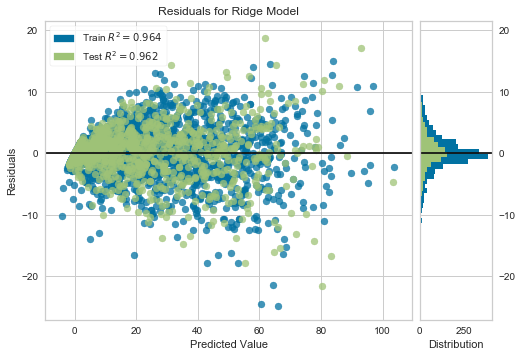

In [46]:
 # Plot the Residuals for Ridge Model
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()  

In [47]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 16.20671839175088, R2: 0.9622650199873727


## Linear Regression for PTS using PS, CA, FA, dZS%, oZS%

In [48]:
# Assign the data to X and y, x predicts y

X = finaldf[['PS', 'CA', 'FA', 'dZS%', 'oZS%']]
y = finaldf['PTS']

In [49]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# Create the model using LinearRegression

model = LinearRegression()

In [52]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
pred_lrm = model.predict(X_test)

In [53]:
# Determining the features that effect the model the most

model.coef_

array([  16.60947402,  -12.79015155,   15.02562678, -189.18526581,
       -188.9338128 ])

In [54]:
# Print Training and Test scores

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8305903919631039
Testing Score: 0.832029648087702


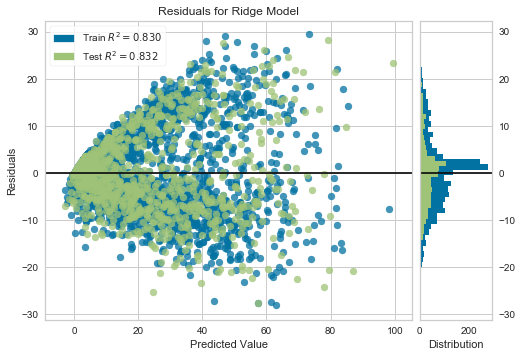

In [55]:
 # Plot the Residuals for Ridge Model
    
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
# Ridge helps prevent over-fitting

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()  

In [56]:
# Print mean squared error and R2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 72.14123846613822, R2: 0.832029648087702


In [ ]:
for 

In [57]:
# Predict 2018 pts for Jason Zucker (actual = 64)
X_zucker = [[ 7.8, 1134, 826, 55.9, 44.1 ]]
X_zucker = sc.transform(X_zucker)
y_zucker = model.predict(X_zucker)
y_zucker

array([53.30685091])